<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/10_3_%EC%97%AC%EB%9F%AC_%EC%88%AB%EC%9E%90_%ED%8C%90%EB%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [ ]:
import cv2

In [ ]:
image = cv2.imread('/g/My Drive/Tensorflow AI/pi100.png')

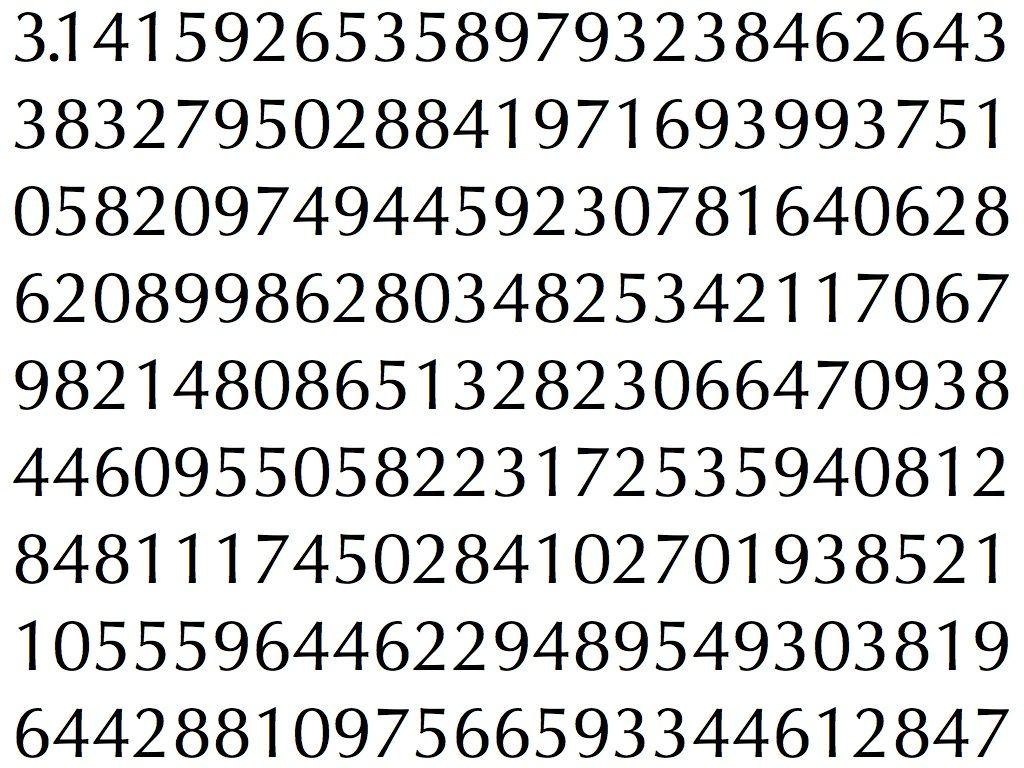

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
image2 = image.copy()

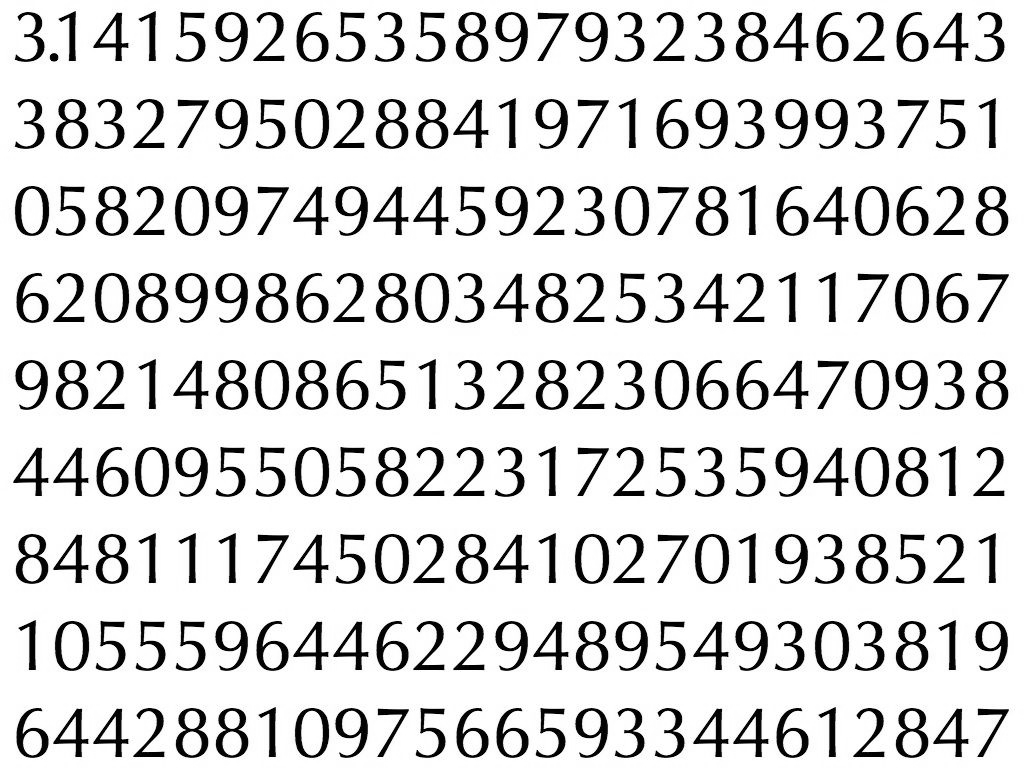

In [ ]:
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

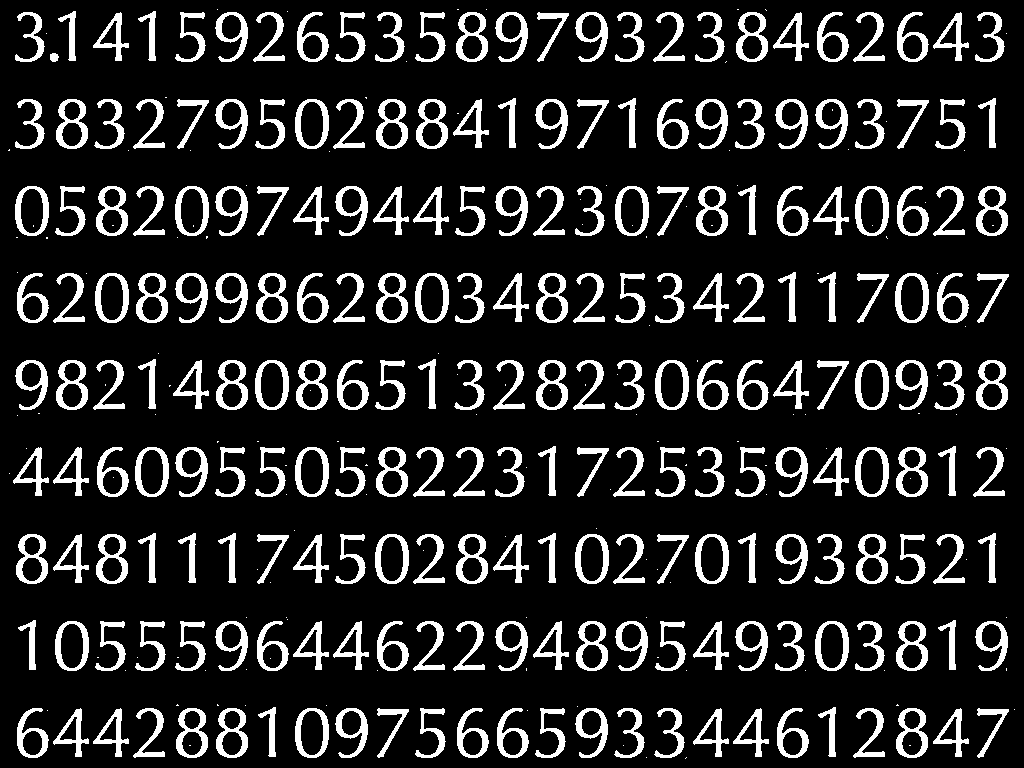

In [ ]:
blur = cv2.GaussianBlur(gray, (5,5),0)
thresh = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
cv2_imshow(thresh)

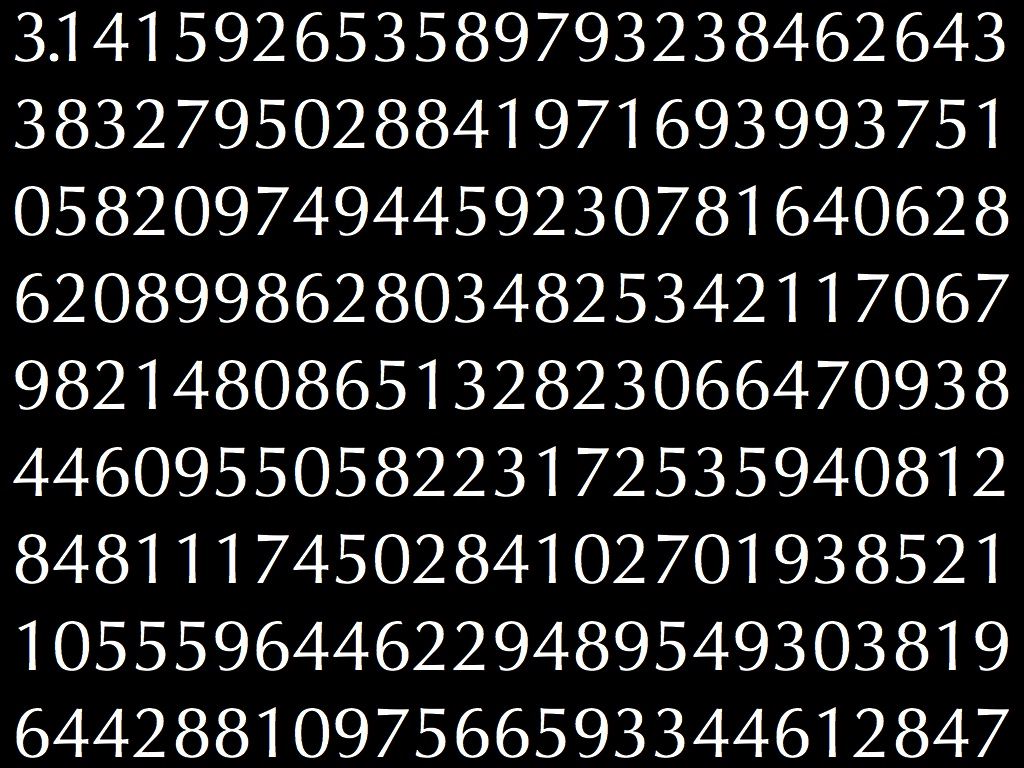

In [ ]:
# 이렇게 명확한 2가지 색깔은 사실 open cv를 사용하지 않고 빼기를 통해서도 간단히 정리됨

image_sub = 255-image2
cv2_imshow(image_sub)

https://opencv-python.readthedocs.io/en/latest/doc/15.imageContours/imageContours.html#contours

In [ ]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [ ]:
contours

[array([[[686, 757]],
 
        [[685, 758]]], dtype=int32),
 array([[[646, 757]]], dtype=int32),
 array([[[623, 745]]], dtype=int32),
 array([[[527, 710]]], dtype=int32),
 array([[[ 47, 710]]], dtype=int32),
 array([[[1014,  709]]], dtype=int32),
 array([[[ 978,  708]],
 
        [[ 977,  709]],
 
        [[ 977,  710]],
 
        [[ 978,  711]],
 
        [[ 978,  712]],
 
        [[ 977,  713]],
 
        [[ 977,  714]],
 
        [[ 978,  715]],
 
        [[ 979,  715]],
 
        [[ 980,  714]],
 
        [[ 996,  714]],
 
        [[ 997,  713]],
 
        [[1001,  713]],
 
        [[1002,  714]],
 
        [[1002,  716]],
 
        [[1000,  718]],
 
        [[1000,  719]],
 
        [[ 998,  721]],
 
        [[ 998,  722]],
 
        [[ 996,  724]],
 
        [[ 996,  725]],
 
        [[ 995,  726]],
 
        [[ 995,  727]],
 
        [[ 994,  728]],
 
        [[ 994,  729]],
 
        [[ 992,  731]],
 
        [[ 992,  732]],
 
        [[ 991,  733]],
 
        [[ 991,  734]],


In [ ]:
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  color = (0,0,255)
  cv2.rectangle(image, (x,y), (x+w,y+h), color, 1)


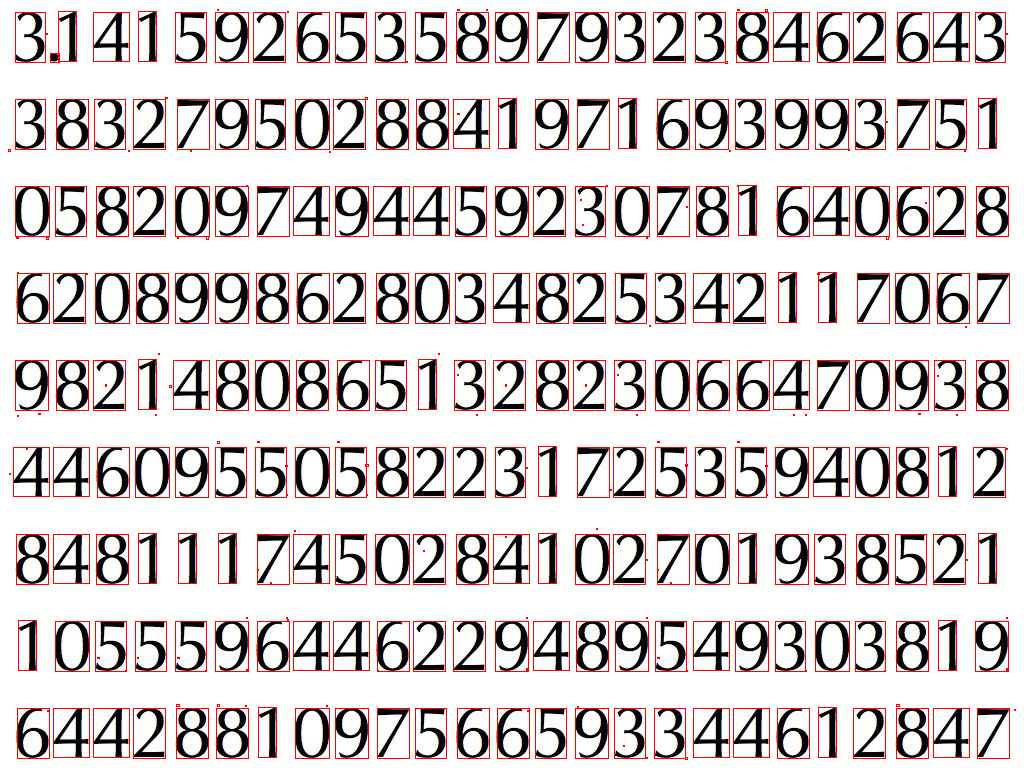

In [ ]:
cv2_imshow(image)

사각형 안의 이미지들을 가져와서 분류해봅시다

In [ ]:
rects = []
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  rects.append({'x':x,'y':y,'w':w,'h':h})

In [ ]:
import pandas as pd
rects_df = pd.DataFrame(rects)

In [ ]:
rects_df.head()

,x,y,w,h
0,685,757,2,2
1,646,757,1,1
2,623,745,1,1
3,527,710,1,1
4,47,710,1,1


In [ ]:
rects_df.describe()

,x,y,w,h
count,344.000000,344.000000,344.000000,344.000000
mean,493.776163,376.758721,20.834302,33.069767
std,292.226238,223.432597,14.673468,23.155598
min,8.000000,9.000000,1.000000,1.000000
25%,246.000000,186.000000,1.750000,1.000000
50%,495.000000,379.500000,31.000000,50.000000
75%,736.250000,559.000000,32.000000,50.000000
max,1014.000000,757.000000,36.000000,50.000000


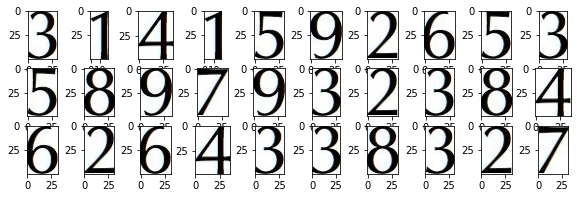

In [ ]:
# 이미지를 살펴보자
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))
for i in range(30):
  fig.add_subplot(3,10,i+1)
  rect = rects_df.loc[i,:]
  im_rect = image2[rect.y:rect.y+rect.h, rect.x:rect.x+rect.w]
  plt.imshow(im_rect)

In [ ]:
#순서가 의미가 있으므로 순서가 잘못되지 않게 인덱싱
import math
rects_df['order_x'] = round(rects_df.x/20).rank()
rects_df['order_y'] = round(rects_df.y/20).rank()
rects_df = rects_df.sort_values(['order_y', 'order_x'])
rects_df

,x,y,w,h,order_x,order_y
343,217,9,1,1,78.5,3.0
342,457,9,2,1,158.5,3.0
341,486,9,1,1,165.5,3.0
340,737,9,2,1,258.5,3.0
339,765,9,2,2,266.0,3.0
...,...,...,...,...,...,...
4,47,710,1,1,18.0,340.5
3,527,710,1,1,179.5,340.5
2,623,745,1,1,212.0,342.0
1,646,757,1,1,220.5,343.5


In [ ]:
# 잘못 분류된 작은 사각형들 제거
rects_df = rects_df.query('w>10 & h>10')
rects_df = rects_df.reset_index(drop=True)

In [ ]:
rects_df

,x,y,w,h,order_x,order_y
0,15,12,30,50,9.0,18.5
1,58,11,18,50,25.0,18.5
2,93,12,36,49,36.0,18.5
3,138,11,18,50,48.5,18.5
4,175,12,31,50,63.5,18.5
...,...,...,...,...,...,...
220,818,707,18,50,285.0,323.5
221,853,708,32,50,296.0,323.5
222,896,708,32,50,308.5,323.5
223,933,708,36,49,321.0,323.5


In [ ]:
rects_df[45:55]

,x,y,w,h,order_x,order_y
45,815,99,33,50,285.0,50.0
46,855,99,30,50,296.0,50.0
47,897,99,32,50,308.5,50.0
48,935,99,31,50,321.0,50.0
49,978,98,18,50,335.0,50.0
50,15,186,34,50,9.0,86.5
51,55,186,31,50,25.0,86.5
52,96,186,32,50,36.0,86.5
53,133,186,32,50,48.5,86.5
54,175,186,34,50,63.5,86.5


In [ ]:
rects_df = rects_df.drop(['order_x','order_y'], axis=1)

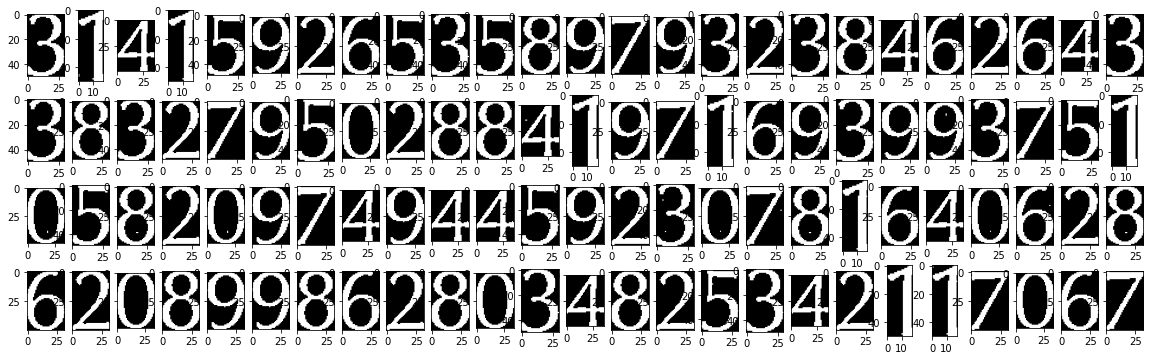

In [ ]:
# 작은 사각형 제거 후
fig = plt.figure(figsize=(20,6))
for i in range(100):
  fig.add_subplot(4,25,i+1)
  rect = rects_df.loc[i,:]
  im_rect = thresh[rect.y:rect.y+rect.h, rect.x:rect.x+rect.w]
  plt.imshow(im_rect, cmap='gray')

In [ ]:
rect = rects_df.loc[1,:]
im_rect = thresh[rect.y:rect.y+rect.h, rect.x:rect.x+rect.w]
cv2_imshow(im_rect)

In [ ]:
im_rect.shape

(50, 18)

In [ ]:
im_rect

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0, 255,
        255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255,
        255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,

In [ ]:
# mnist size에 맞추기
im_q = cv2.resize(im_rect, (28,28))
cv2_imshow(im_q)

# --> 단순 resize를 하면 숫자가 왜곡되어 정확도가 낮아진다

In [ ]:
# 정사각형을 만들고 그 안에 그림 옮기기
import numpy as np
ww = int((rect.w if rect.w>rect.h else rect.h)*1.85)
new_rect = np.zeros((ww,ww))
wy = (ww-rect.h)//2
wx = (ww-rect.w)//2
new_rect[wy:wy+rect.h, wx:wx+rect.w]=im_rect

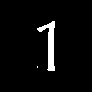

In [ ]:
cv2_imshow(new_rect)

In [ ]:
x=[]
for idx, rect in rects_df.iterrows():
  im_rect = thresh[rect.y:rect.y+rect.h, rect.x:rect.x+rect.w]  
  ww = int(round((rect.w if rect.w>rect.h else rect.h))*1.85)
  new_rect = np.zeros((ww,ww))
  wy = (ww-rect.h)//2
  wx = (ww-rect.w)//2  
  new_rect[wy:wy+rect.h, wx:wx+rect.w]=im_rect
  new_rect = cv2.resize(new_rect,(28,28))
  x.append(new_rect)


In [ ]:
import numpy as np
x= np.array(x)
x.shape

(225, 28, 28)

In [ ]:
# MNIST Model 학습하기

import tensorflow as tf
from tensorflow.keras import layers, models

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
cv2_imshow(x_train[0,:,:]*255) 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

# 모델 평가
model.evaluate(x_test,  y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)             

[0.02799137309193611, 0.9912999868392944]

In [ ]:
X= x/255

In [ ]:
X=np.expand_dims(X, axis = 3)

In [ ]:
X.shape

(225, 28, 28, 1)

In [ ]:
X[0,:,:].max()

1.0

In [ ]:
pred = model.predict(X)

In [ ]:
pred.shape

(225, 10)

In [ ]:
pred_label = np.argmax(pred, axis=1)

In [ ]:
pred_label

array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2,
       6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3,
       9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0,
       7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4,
       8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9, 8, 2, 1, 4, 8, 0, 8, 6, 5,
       1, 3, 2, 8, 2, 3, 0, 6, 6, 4, 7, 0, 9, 3, 8, 4, 4, 6, 0, 9, 5, 5,
       0, 5, 8, 2, 2, 3, 1, 7, 2, 5, 3, 5, 9, 4, 0, 8, 1, 2, 8, 4, 8, 1,
       1, 1, 7, 4, 5, 0, 2, 8, 4, 1, 0, 2, 7, 0, 1, 9, 3, 8, 5, 2, 1, 1,
       0, 5, 5, 5, 9, 6, 4, 4, 6, 2, 2, 9, 4, 8, 9, 5, 4, 9, 3, 0, 3, 8,
       1, 9, 6, 4, 4, 2, 8, 8, 1, 0, 9, 7, 5, 6, 6, 5, 9, 3, 3, 4, 4, 6,
       1, 2, 8, 4, 7])

In [ ]:
pi = '''3.1415926535 8979323846 2643383279 5028841971 6939937510 5820974944 5923078164 0628620899 8628034825 3421170679
  8214808651 3282306647 0938446095 5058223172 5359408128 4811174502 8410270193 8521105559 6446229489 5493038196
  4428810975 6659334461 2847564823 3786783165 2712019091 4564856692 3460348610 4543266482 1339360726 0249141273
  7245870066 0631558817 4881520920 9628292540 9171536436 7892590360 0113305305 4882046652 1384146951 9415116094
  3305727036 5759591953 0921861173 8193261179 3105118548 0744623799 6274956735 1885752724 8912279381 8301194912
  9833673362 4406566430 8602139494 6395224737 1907021798 6094370277 0539217176 2931767523 8467481846 7669405132
  0005681271 4526356082 7785771342 7577896091 7363717872 1468440901 2249534301 4654958537 1050792279 6892589235
  4201995611 2129021960 8640344181 5981362977 4771309960 5187072113 4999999837 2978049951 0597317328 1609631859
  5024459455 3469083026 4252230825 3344685035 2619311881 7101000313 7838752886 5875332083 8142061717 7669147303
  5982534904 2875546873 1159562863 8823537875 9375195778 1857780532 1712268066 1300192787 6611195909 2164201989'''

In [ ]:
pi=pi.replace('.','').replace(' ','').replace('\n','')

In [ ]:
pi

'314159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [ ]:
pi = pi[:len(pred_label)]

In [ ]:
pi

'314159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847'

In [ ]:
p = pd.Series(list(pi))

In [ ]:
p

0      3
1      1
2      4
3      1
4      5
      ..
220    1
221    2
222    8
223    4
224    7
Length: 225, dtype: object

In [ ]:
p = pd.to_numeric(p)

In [ ]:
p

0      3
1      1
2      4
3      1
4      5
      ..
220    1
221    2
222    8
223    4
224    7
Length: 225, dtype: int64

In [ ]:
result = pd.DataFrame({'predict':pred_label, 'answer':p})

In [ ]:
result

,predict,answer
0,3,3
1,1,1
2,4,4
3,1,1
4,5,5
...,...,...
220,1,1
221,2,2
222,8,8
223,4,4


In [ ]:
result['wrong'] = result.predict!=result.answer

In [ ]:
result

,predict,answer,wrong
0,3,3,False
1,1,1,False
2,4,4,False
3,1,1,False
4,5,5,False
...,...,...,...
220,1,1,False
221,2,2,False
222,8,8,False
223,4,4,False


In [ ]:
result[result.wrong]

,predict,answer,wrong
